In [1]:
# %reload_ext tensorboard
# %tensorboard --logdir=C:/Users/vohi0/Desktop/Semantic/results/

In [2]:
import matplotlib.pyplot as plt 
import pandas as pd
import numpy as np


mnist_log = pd.read_csv('./record/MNIST_LogisticRegression_lightning_logs_version_7.csv')
mnist_log['Relative time'] = mnist_log['Wall time'] - mnist_log.iloc[0]['Wall time']
mnist_res = pd.read_csv('./record/MNIST_ResNet_lightning_logs_version_0.csv')
mnist_res['Relative time'] = mnist_res['Wall time'] - mnist_res.iloc[0]['Wall time']

mnist_logtest = pd.read_csv('./record/MNIST_LogisticRegression_test.csv')
mnist_logtest['Relative time'] = mnist_logtest['Wall time'] - mnist_logtest.iloc[0]['Wall time']
mnist_restest = pd.read_csv('./record/MNIST_ResNet_test.csv')
mnist_restest['Relative time'] = mnist_restest['Wall time'] - mnist_restest.iloc[0]['Wall time']

mnist_log = mnist_log.groupby(np.arange(len(mnist_log))//10).mean()
episodes = list(range(0, len(mnist_log)))
mnist_log['Episode'] = episodes
mnist_res = mnist_res.groupby(np.arange(len(mnist_res))//10).mean()
mnist_res['Episode'] = episodes

# mnist_logtest = mnist_logtest.groupby(np.arange(len(mnist_logtest))//10).mean()
episodes = list(range(0, len(mnist_logtest)))
mnist_logtest['Episode'] = episodes
mnist_restest = mnist_restest.groupby(np.arange(len(mnist_restest))//5).mean()
mnist_restest['Episode'] = episodes

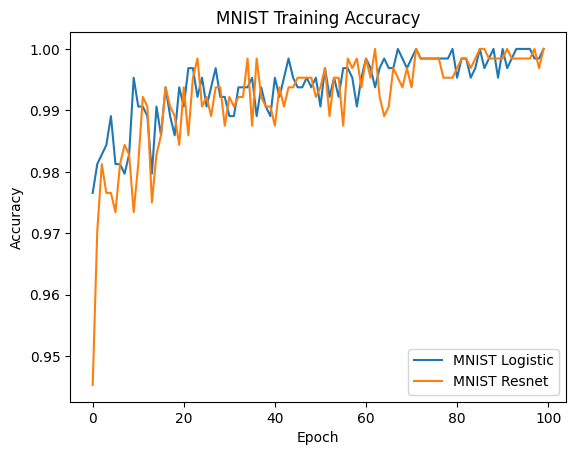

In [3]:
plt.plot(mnist_log['Episode'], mnist_log['Value'], label='MNIST Logistic')
plt.plot(mnist_res['Episode'], mnist_res['Value'], label='MNIST Resnet')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('MNIST Training Accuracy')
plt.savefig('../figures/classification/MNIST_Train_acc.png')
plt.show()

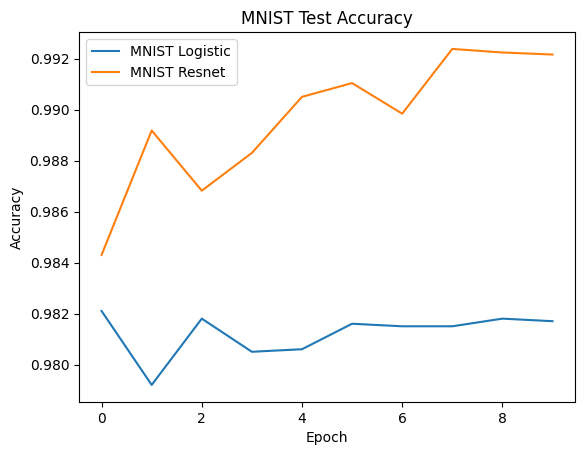

In [4]:
plt.plot(mnist_logtest['Episode'], mnist_logtest['Value'], label='MNIST Logistic')
plt.plot(mnist_restest['Episode'], mnist_restest['Value'], label='MNIST Resnet')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('MNIST Test Accuracy')
plt.savefig('../figures/classification/MNIST_Test_acc.png')

plt.show()

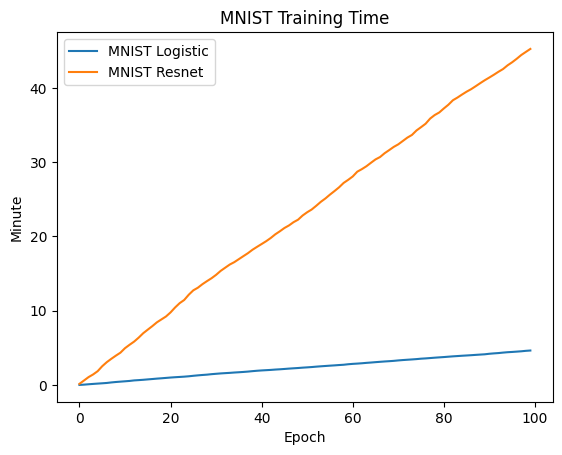

In [5]:
plt.plot(mnist_log['Episode'], mnist_log['Relative time']/60, label='MNIST Logistic')
plt.plot(mnist_res['Episode'], mnist_res['Relative time']/60, label='MNIST Resnet')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Minute')
plt.title('MNIST Training Time')
plt.savefig('../figures/classification/MNIST_Train_time.png')

plt.show()

In [6]:
stl_log = pd.read_csv('./record/STL10_LogisticRegression_lightning_logs_version_5.csv')
stl_log['Relative time'] = stl_log['Wall time'] - stl_log.iloc[0]['Wall time']
stl_res = pd.read_csv('./record/STL10_ResNet_lightning_logs_version_4.csv')
stl_res['Relative time'] = stl_res['Wall time'] - stl_res.iloc[0]['Wall time']


stl_log = stl_log.groupby(np.arange(len(stl_log))//10).mean()
episodes = list(range(0, len(stl_log)))
stl_log['Episode'] = episodes
stl_res = stl_res.groupby(np.arange(len(stl_res))//10).mean()
stl_res['Episode'] = episodes

stl_logtest = pd.read_csv('./record/STL10_LogisticRegression_test.csv')
# stl_logtest = stl_logtest.head(156)
stl_logtest['Relative time'] = stl_logtest['Wall time'] - stl_logtest.iloc[0]['Wall time']
stl_restest = pd.read_csv('./record/STL10_ResNet_test.csv')
stl_restest['Relative time'] = stl_restest['Wall time'] - stl_restest.iloc[0]['Wall time']


# stl_logtest = stl_logtest.groupby(np.arange(len(stl_logtest))//10).mean()
episodes = list(range(0, len(stl_logtest)))
stl_logtest['Episode'] = episodes
stl_restest = stl_restest.groupby(np.arange(len(stl_restest))//5).mean()
stl_restest['Episode'] = episodes

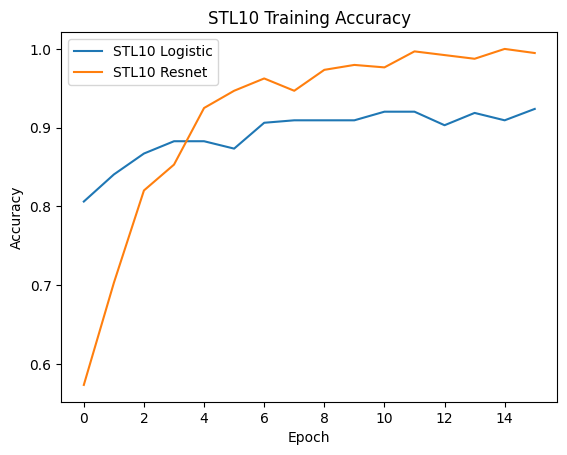

In [7]:
plt.plot(stl_log['Episode'], stl_log['Value'], label='STL10 Logistic')
plt.plot(stl_res['Episode'], stl_res['Value'], label='STL10 Resnet')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('STL10 Training Accuracy')
plt.savefig('../figures/classification/STL10_Train_acc.png')

plt.show()

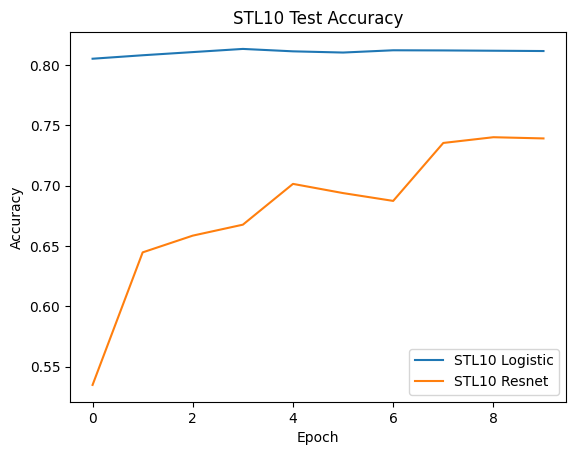

In [8]:
plt.plot(stl_logtest['Episode'], stl_logtest['Value'], label='STL10 Logistic')
plt.plot(stl_restest['Episode'], stl_restest['Value'], label='STL10 Resnet')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('STL10 Test Accuracy')
plt.savefig('../figures/classification/STL10_Test_acc.png')

plt.show()

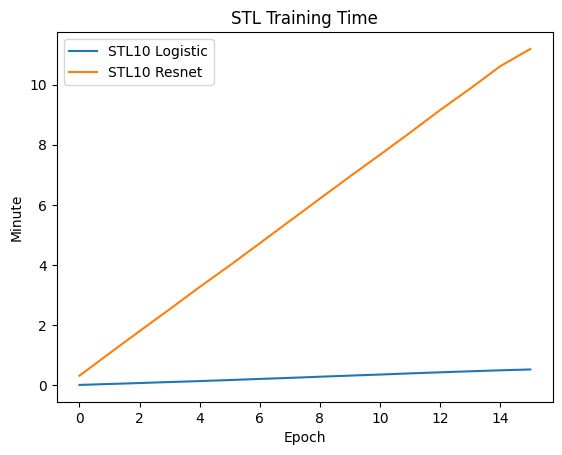

In [9]:
plt.plot(stl_log['Episode'], stl_log['Relative time']/60, label='STL10 Logistic')
plt.plot(stl_res['Episode'], stl_res['Relative time']/60, label='STL10 Resnet')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Minute')
plt.title('STL Training Time')
plt.savefig('../figures/classification/STL10_Train_time.png')

plt.show()